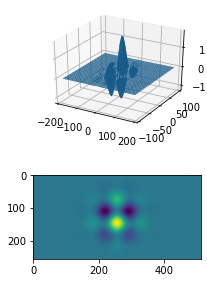

In [63]:
import numpy as np
from scipy.fft import fft2, ifft2, fftfreq
import matplotlib.pyplot as plt

Lx = 120*np.pi
Ly = 60*np.pi
Nx = 512
Ny = 256
x = np.linspace(-Lx/2,Lx/2,Nx)
y = np.linspace(-Ly/2,Ly/2,Ny)
X,Y = np.meshgrid(x,y)

def test_func(x,y):
    exponent = -(x**2+y**2)
    return (np.cos(x/10)+np.sin(y/10))*np.exp(exponent/2000)

fig = plt.figure(figsize=(3,5))
ax1 = fig.add_subplot(211, projection='3d')
Z = test_func(X,Y)
ax1.plot_surface(X,Y,Z)
ax2 = fig.add_subplot(212)
ax2.imshow(Z)

Define test function.
Should decay to zero on boundary of domain, so that
fft applies

norm of difference 0.011015262969807363
norm of exact 5.628799377565134
rel err 0.0019569471624288496
sum of exact f_x 1.8327353523694967e-15
sum of fft f_x 9.77950359581925e-17
mean of exact f_x 1.398266107459638e-20
mean of fft f_x 7.46116912522831e-22
max of exact f_x 0.097480098743214
max of fft f_x 0.09767086214589722
min of exact f_x -0.09748009874321403
min of fft f_x -0.09767086214589754
std dev of f_x 0.015547508632089552
std dev of fft f_x 0.015577934284989922
max diff 0.0001907634026835081


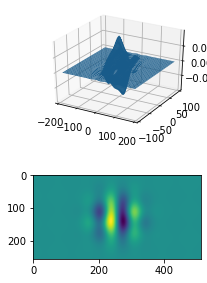

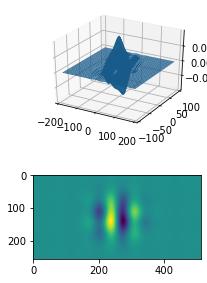

In [64]:
def test_func_x(x,y):
    exponent = x**2+y**2
    top_exp = np.exp(-exponent/2000)
    top_trig = x*np.sin(y/10)+100*np.sin(x/10)+x*np.cos(x/10)
    return -top_exp*top_trig/1000

fig = plt.figure(figsize=(3,5))
ax1 = fig.add_subplot(211, projection='3d')
f_x = test_func_x(X,Y)
ax1.plot_surface(X,Y,f_x)
ax2 = fig.add_subplot(212)
ax2.imshow(f_x)

def fft_partial_x(func,Lx,Ly):
    ny, nx = np.shape(func)
    kx = (2. * np.pi /Lx)*fftfreq(nx, 1. / nx)
    ky = (2. * np.pi /Ly)*fftfreq(ny, 1. / ny)
    Kx, Ky = np.meshgrid(kx, ky)
    return np.real(ifft2(1j*Kx*fft2(func)))

fig2 = plt.figure(figsize=(3,5))
ax12 = fig2.add_subplot(211, projection='3d')
fft_f_x = fft_partial_x(Z,Lx,Ly)
ax12.plot_surface(X,Y,fft_f_x)
ax22 = fig2.add_subplot(212)
ax22.imshow(fft_f_x)

print("norm of difference",np.linalg.norm(f_x-fft_f_x))
print("norm of exact",np.linalg.norm(f_x))
print("rel err", np.linalg.norm(f_x-fft_f_x)/np.linalg.norm(f_x))
print("sum of exact f_x",np.sum(f_x))
print("sum of fft f_x",np.sum(fft_f_x))
print("mean of exact f_x",np.mean(f_x))
print("mean of fft f_x",np.mean(fft_f_x))
print("max of exact f_x",np.max(f_x))
print("max of fft f_x",np.max(fft_f_x))
print("min of exact f_x",np.min(f_x))
print("min of fft f_x",np.min(fft_f_x))
print("std dev of f_x",np.std(f_x))
print("std dev of fft f_x",np.std(fft_f_x))
print("max diff",np.max(np.abs(f_x-fft_f_x)))

norm of difference 0.02524365945388377
norm of exact 5.628747870892771
rel err 0.004484773529193429
sum of exact f_y -0.12363257517364179
sum of fft f_y -2.6645352591003757e-15
mean of exact f_y -9.432416929141372e-07
mean of fft f_y -2.0328790734103208e-20
max of exact f_y 0.10030276026132254
max of fft f_y 0.10069619727769744
min of exact f_y -0.08954290975587356
min of fft f_y -0.08989759263153871
std dev of f_y 0.015547366335049866
std dev of fft f_y 0.015608313327970129
max diff 0.0011259689798605059


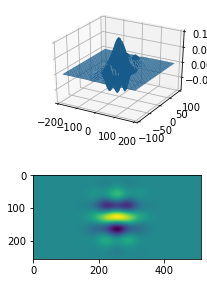

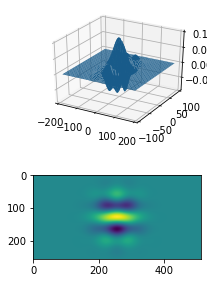

In [65]:
def test_func_y(x,y):
    exponent = x**2+y**2
    top_exp = np.exp(-exponent/2000)
    top_trig = -y*np.cos(x/10)+100*np.cos(y/10)-y*np.sin(y/10)
    return top_exp*top_trig/1000

fig = plt.figure(figsize=(3,5))
ax1 = fig.add_subplot(211, projection='3d')
f_y = test_func_y(X,Y)
ax1.plot_surface(X,Y,f_y)
ax2 = fig.add_subplot(212)
ax2.imshow(f_y)

def fft_partial_y(func,Lx,Ly):
    ny, nx = np.shape(func)
    kx = (2. * np.pi /Lx)*fftfreq(nx, 1. / nx)
    ky = (2. * np.pi /Ly)*fftfreq(ny, 1. / ny)
    Kx, Ky = np.meshgrid(kx, ky)
    return np.real(ifft2(1j*Ky*fft2(func)))

fig2 = plt.figure(figsize=(3,5))
ax12 = fig2.add_subplot(211, projection='3d')
fft_f_y = fft_partial_y(Z,Lx,Ly)
ax12.plot_surface(X,Y,fft_f_y)
ax22 = fig2.add_subplot(212)
ax22.imshow(fft_f_y)

print("norm of difference",np.linalg.norm(f_y-fft_f_y))
print("norm of exact",np.linalg.norm(f_y))
print("rel err", np.linalg.norm(f_y-fft_f_y)/np.linalg.norm(f_y))
print("sum of exact f_y",np.sum(f_y))
print("sum of fft f_y",np.sum(fft_f_y))
print("mean of exact f_y",np.mean(f_y))
print("mean of fft f_y",np.mean(fft_f_y))
print("max of exact f_y",np.max(f_y))
print("max of fft f_y",np.max(fft_f_y))
print("min of exact f_y",np.min(f_y))
print("min of fft f_y",np.min(fft_f_y))
print("std dev of f_y",np.std(f_y))
print("std dev of fft f_y",np.std(fft_f_y))
print("max diff",np.max(np.abs(f_y-fft_f_y)))

norm of difference 0.0011004833106030543
norm of exact 0.17388686858943758
rel err 0.006328731545574
sum of exact f_xy -1.5990626791445584e-16
sum of fft f_xy -1.1695830935687379e-17
mean of exact f_xy -1.2199880059391467e-21
mean of fft f_xy -8.923210857915786e-23
max of exact f_xy 0.00264429358702879
max of fft f_xy 0.0026598052590895076
min of exact f_xy -0.00264429358702879
min of fft f_xy -0.002659805259089526
std dev of f_xy 0.0004802991560112711
std dev of fft f_xy 0.00048312304431857823
max diff 4.001924662917597e-05


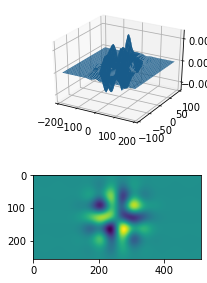

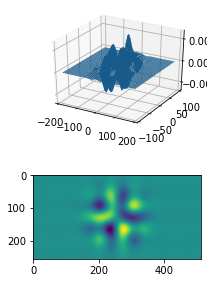

In [66]:
def test_func_xy(x,y):
    exponent = x**2+y**2
    top_exp = np.exp(-exponent/2000)
    top_trig = 100*y*np.sin(x/10)+x*y*np.sin(y/10)+x*y*np.cos(x/10)-100*x*np.cos(y/10)
    return top_exp*top_trig/1000000

fig = plt.figure(figsize=(3,5))
ax1 = fig.add_subplot(211, projection='3d')
f_xy = test_func_xy(X,Y)
ax1.plot_surface(X,Y,f_xy)
ax2 = fig.add_subplot(212)
ax2.imshow(f_xy)

def fft_partial_xy(func,Lx,Ly):
    ny, nx = np.shape(func)
    kx = (2. * np.pi /Lx)*fftfreq(nx, 1. / nx)
    ky = (2. * np.pi /Ly)*fftfreq(ny, 1. / ny)
    Kx, Ky = np.meshgrid(kx, ky)
    return np.real(ifft2((1j*Ky)*(1j*Kx)*fft2(func)))

fig2 = plt.figure(figsize=(3,5))
ax12 = fig2.add_subplot(211, projection='3d')
fft_f_xy = fft_partial_xy(Z,Lx,Ly)
ax12.plot_surface(X,Y,fft_f_xy)
ax22 = fig2.add_subplot(212)
ax22.imshow(fft_f_xy)

print("norm of difference",np.linalg.norm(f_xy-fft_f_xy))
print("norm of exact",np.linalg.norm(f_xy))
print("rel err", np.linalg.norm(f_xy-fft_f_xy)/np.linalg.norm(f_xy))
print("sum of exact f_xy",np.sum(f_xy))
print("sum of fft f_xy",np.sum(fft_f_xy))
print("mean of exact f_xy",np.mean(f_xy))
print("mean of fft f_xy",np.mean(fft_f_xy))
print("max of exact f_xy",np.max(f_xy))
print("max of fft f_xy",np.max(fft_f_xy))
print("min of exact f_xy",np.min(f_xy))
print("min of fft f_xy",np.min(fft_f_xy))
print("std dev of f_xy",np.std(f_xy))
print("std dev of fft f_xy",np.std(fft_f_xy))
print("max diff",np.max(np.abs(f_xy-fft_f_xy)))

norm of difference 0.002411104552756359
norm of exact 0.6154350259727737
rel err 0.003917723969228596
sum of exact f_xx -1.0019958203419353e-06
sum of fft f_xx 7.361393937997673e-17
mean of exact f_xx -7.644621432052119e-12
mean of fft f_xx 5.616297865293635e-22
max of exact f_xx 0.008309124302056362
max of fft f_xx 0.00834167715748271
min of exact f_xx -0.01135134045296194
min of fft f_xx -0.01139581187151293
std dev of f_xx 0.0016999151572072938
std dev of fft f_xx 0.0017065749555606532
max diff 4.447141855099153e-05


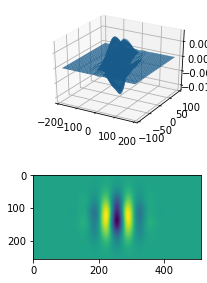

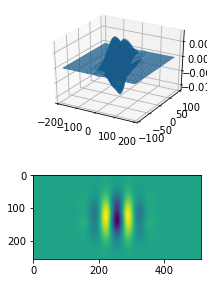

In [67]:
def test_func_xx(x,y):
    exponent = x**2+y**2
    top_exp = np.exp(-exponent/2000)
    top_trig = (x**2-1000)*np.sin(y/10)+(x**2-11000)*np.cos(x/10)+200*x*np.sin(x/10)
    return top_exp*top_trig/1000000

fig = plt.figure(figsize=(3,5))
ax1 = fig.add_subplot(211, projection='3d')
f_xx = test_func_xx(X,Y)
ax1.plot_surface(X,Y,f_xx)
ax2 = fig.add_subplot(212)
ax2.imshow(f_xx)

def fft_partial_xx(func,Lx,Ly):
    ny, nx = np.shape(func)
    kx = (2. * np.pi /Lx)*fftfreq(nx, 1. / nx)
    ky = (2. * np.pi /Ly)*fftfreq(ny, 1. / ny)
    Kx, Ky = np.meshgrid(kx, ky)
    return np.real(ifft2((1j*Kx)*(1j*Kx)*fft2(func)))

fig2 = plt.figure(figsize=(3,5))
ax12 = fig2.add_subplot(211, projection='3d')
fft_f_xx = fft_partial_xx(Z,Lx,Ly)
ax12.plot_surface(X,Y,fft_f_xx)
ax22 = fig2.add_subplot(212)
ax22.imshow(fft_f_xx)

print("norm of difference",np.linalg.norm(f_xx-fft_f_xx))
print("norm of exact",np.linalg.norm(f_xx))
print("rel err", np.linalg.norm(f_xx-fft_f_xx)/np.linalg.norm(f_xx))
print("sum of exact f_xx",np.sum(f_xx))
print("sum of fft f_xx",np.sum(fft_f_xx))
print("mean of exact f_xx",np.mean(f_xx))
print("mean of fft f_xx",np.mean(fft_f_xx))
print("max of exact f_xx",np.max(f_xx))
print("max of fft f_xx",np.max(fft_f_xx))
print("min of exact f_xx",np.min(f_xx))
print("min of fft f_xx",np.min(fft_f_xx))
print("std dev of f_xx",np.std(f_xx))
print("std dev of fft f_xx",np.std(fft_f_xx))
print("max diff",np.max(np.abs(f_xx-fft_f_xx)))

norm of difference 0.035804072930012136
norm of exact 0.6154058476719565
rel err 0.05817961117115933
sum of exact f_yy -0.002108088471302061
sum of fft f_yy 9.992007221626409e-16
mean of exact f_yy -1.6083438654343116e-08
mean of fft f_yy 7.623296525288703e-21
max of exact f_yy 0.009468079329658003
max of fft f_yy 0.009542231790568161
min of exact f_yy -0.011026612690260213
min of fft f_yy -0.011113517979529128
std dev of f_yy 0.001699834562700068
std dev of fft f_yy 0.0017163569939113487
max diff 0.004201271487177976


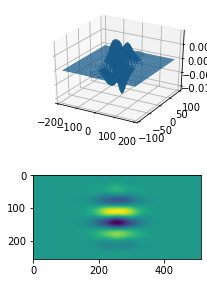

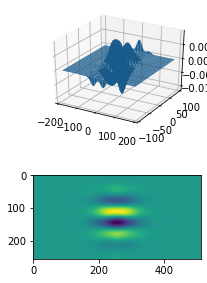

In [68]:
def test_func_yy(x,y):
    exponent = x**2+y**2
    top_exp = np.exp(-exponent/2000)
    top_trig = (y**2-1000)*np.cos(x/10)+(y**2-11000)*np.sin(y/10)-200*y*np.cos(y/10)
    return top_exp*top_trig/1000000

fig = plt.figure(figsize=(3,5))
ax1 = fig.add_subplot(211, projection='3d')
f_yy = test_func_yy(X,Y)
ax1.plot_surface(X,Y,f_yy)
ax2 = fig.add_subplot(212)
ax2.imshow(f_yy)

def fft_partial_yy(func,Lx,Ly):
    ny, nx = np.shape(func)
    kx = (2. * np.pi /Lx)*fftfreq(nx, 1. / nx)
    ky = (2. * np.pi /Ly)*fftfreq(ny, 1. / ny)
    Kx, Ky = np.meshgrid(kx, ky)
    return np.real(ifft2((1j*Ky)*(1j*Ky)*fft2(func)))

fig2 = plt.figure(figsize=(3,5))
ax12 = fig2.add_subplot(211, projection='3d')
fft_f_yy = fft_partial_yy(Z,Lx,Ly)
ax12.plot_surface(X,Y,fft_f_yy)
ax22 = fig2.add_subplot(212)
ax22.imshow(fft_f_yy)

print("norm of difference",np.linalg.norm(f_yy-fft_f_yy))
print("norm of exact",np.linalg.norm(f_yy))
print("rel err", np.linalg.norm(f_yy-fft_f_yy)/np.linalg.norm(f_yy))
print("sum of exact f_yy",np.sum(f_yy))
print("sum of fft f_yy",np.sum(fft_f_yy))
print("mean of exact f_yy",np.mean(f_yy))
print("mean of fft f_yy",np.mean(fft_f_yy))
print("max of exact f_yy",np.max(f_yy))
print("max of fft f_yy",np.max(fft_f_yy))
print("min of exact f_yy",np.min(f_yy))
print("min of fft f_yy",np.min(fft_f_yy))
print("std dev of f_yy",np.std(f_yy))
print("std dev of fft f_yy",np.std(fft_f_yy))
print("max diff",np.max(np.abs(f_yy-fft_f_yy)))

This had a high relative error... retrying

In [ ]:
def test_func_yy(x,y):
    exponent = x**2+y**2
    top_exp = np.exp(-exponent/2000)
    top_trig = (y**2-1000)*np.cos(x/10)+(y**2-11000)*np.sin(y/10)-200*y*np.cos(y/10)
    return top_exp*top_trig/1000000

fig = plt.figure(figsize=(3,5))
ax1 = fig.add_subplot(211, projection='3d')
f_yy = test_func_yy(X,Y)
ax1.plot_surface(X,Y,f_yy)
ax2 = fig.add_subplot(212)
ax2.imshow(f_yy)

def fft_partial_yy(func,Lx,Ly):
    func_y = fft_partial_y(func,Lx,Ly)
    return fft_partial_y(func_y,Lx,Ly)

fig2 = plt.figure(figsize=(3,5))
ax12 = fig2.add_subplot(211, projection='3d')
fft_f_yy = fft_partial_yy(Z,Lx,Ly)
ax12.plot_surface(X,Y,fft_f_yy)
ax22 = fig2.add_subplot(212)
ax22.imshow(fft_f_yy)

print("norm of difference",np.linalg.norm(f_yy-fft_f_yy))
print("norm of exact",np.linalg.norm(f_yy))
print("rel err", np.linalg.norm(f_yy-fft_f_yy)/np.linalg.norm(f_yy))
print("sum of exact f_yy",np.sum(f_yy))
print("sum of fft f_yy",np.sum(fft_f_yy))
print("mean of exact f_yy",np.mean(f_yy))
print("mean of fft f_yy",np.mean(fft_f_yy))
print("max of exact f_yy",np.max(f_yy))
print("max of fft f_yy",np.max(fft_f_yy))
print("min of exact f_yy",np.min(f_yy))
print("min of fft f_yy",np.min(fft_f_yy))
print("std dev of f_yy",np.std(f_yy))
print("std dev of fft f_yy",np.std(fft_f_yy))
print("max diff",np.max(np.abs(f_yy-fft_f_yy)))

def test_func_yy(x,y):
    exponent = x**2+y**2
    top_exp = np.exp(-exponent/2000)
    top_trig = (y**2-1000)*np.cos(x/10)+(y**2-11000)*np.sin(y/10)-200*y*np.cos(y/10)
    return top_exp*top_trig/1000000

fig = plt.figure(figsize=(3,5))
ax1 = fig.add_subplot(211, projection='3d')
f_yy = test_func_yy(X,Y)
ax1.plot_surface(X,Y,f_yy)
ax2 = fig.add_subplot(212)
ax2.imshow(f_yy)

def fft_partial_yy(func,Lx,Ly):
    func_y = fft_partial_y(func,Lx,Ly)
    return fft_partial_y(func_y,Lx,Ly)

fig2 = plt.figure(figsize=(3,5))
ax12 = fig2.add_subplot(211, projection='3d')
fft_f_yy = fft_partial_yy(Z,Lx,Ly)
ax12.plot_surface(X,Y,fft_f_yy)
ax22 = fig2.add_subplot(212)
ax22.imshow(fft_f_yy)

print("norm of difference",np.linalg.norm(f_yy-fft_f_yy))
print("norm of exact",np.linalg.norm(f_yy))
print("rel err", np.linalg.norm(f_yy-fft_f_yy)/np.linalg.norm(f_yy))
print("sum of exact f_yy",np.sum(f_yy))
print("sum of fft f_yy",np.sum(fft_f_yy))
print("mean of exact f_yy",np.mean(f_yy))
print("mean of fft f_yy",np.mean(fft_f_yy))
print("max of exact f_yy",np.max(f_yy))
print("max of fft f_yy",np.max(fft_f_yy))
print("min of exact f_yy",np.min(f_yy))
print("min of fft f_yy",np.min(fft_f_yy))
print("std dev of f_yy",np.std(f_yy))
print("std dev of fft f_yy",np.std(fft_f_yy))
print("max diff",np.max(np.abs(f_yy-fft_f_yy)))

norm of difference 0.035557363054705325
norm of exact 0.6154058476719565
rel err 0.05777872145546992
sum of exact f_yy -0.002108088471302061
sum of fft f_yy -4.440892098500626e-16
mean of exact f_yy -1.6083438654343116e-08
mean of fft f_yy -3.3881317890172014e-21
max of exact f_yy 0.009468079329658003
max of fft f_yy 0.009573172243653717
min of exact f_yy -0.011026612690260213
min of fft f_yy -0.011115706871201624
std dev of f_yy 0.001699834562700068
std dev of fft f_yy 0.0017163156058765286
max diff 0.004170331034092411


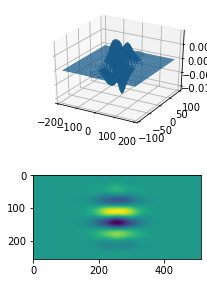

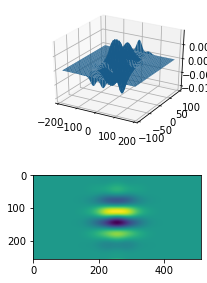

In [69]:
def test_func_yy(x,y):
    exponent = x**2+y**2
    top_exp = np.exp(-exponent/2000)
    top_trig = (y**2-1000)*np.cos(x/10)+(y**2-11000)*np.sin(y/10)-200*y*np.cos(y/10)
    return top_exp*top_trig/1000000

fig = plt.figure(figsize=(3,5))
ax1 = fig.add_subplot(211, projection='3d')
f_yy = test_func_yy(X,Y)
ax1.plot_surface(X,Y,f_yy)
ax2 = fig.add_subplot(212)
ax2.imshow(f_yy)

def fft_partial_yy(func,Lx,Ly):
    func_y = fft_partial_y(func,Lx,Ly)
    return fft_partial_y(func_y,Lx,Ly)

fig2 = plt.figure(figsize=(3,5))
ax12 = fig2.add_subplot(211, projection='3d')
fft_f_yy = fft_partial_yy(Z,Lx,Ly)
ax12.plot_surface(X,Y,fft_f_yy)
ax22 = fig2.add_subplot(212)
ax22.imshow(fft_f_yy)

print("norm of difference",np.linalg.norm(f_yy-fft_f_yy))
print("norm of exact",np.linalg.norm(f_yy))
print("rel err", np.linalg.norm(f_yy-fft_f_yy)/np.linalg.norm(f_yy))
print("sum of exact f_yy",np.sum(f_yy))
print("sum of fft f_yy",np.sum(fft_f_yy))
print("mean of exact f_yy",np.mean(f_yy))
print("mean of fft f_yy",np.mean(fft_f_yy))
print("max of exact f_yy",np.max(f_yy))
print("max of fft f_yy",np.max(fft_f_yy))
print("min of exact f_yy",np.min(f_yy))
print("min of fft f_yy",np.min(fft_f_yy))
print("std dev of f_yy",np.std(f_yy))
print("std dev of fft f_yy",np.std(fft_f_yy))
print("max diff",np.max(np.abs(f_yy-fft_f_yy)))